In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df=pd.read_csv('Salary_dataset.csv')
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [2]:
df.shape

(30, 2)

In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [5]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


find the skewness of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df = df.drop(columns=['Unnamed: 0'],errors='ignore')
df.to_csv("Salary_dataset.csv", index=False)
df.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Skewness for YearsExperience: 0.37956024064804234


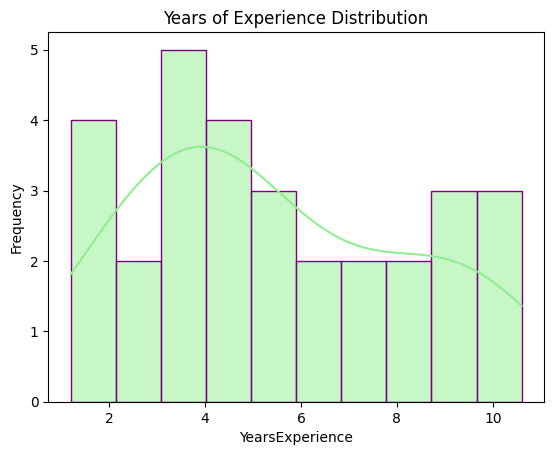

In [8]:
print("Skewness for YearsExperience:", df['YearsExperience'].skew())
plt.figure()
sns.histplot(df['YearsExperience'], bins=10, color='lightgreen', edgecolor='purple', kde=True)
plt.title('Years of Experience Distribution')
plt.xlabel('YearsExperience')
plt.ylabel('Frequency')
plt.show()

Skewness for Salary: 0.35411967922959153


<Axes: xlabel='Salary', ylabel='Frequency'>

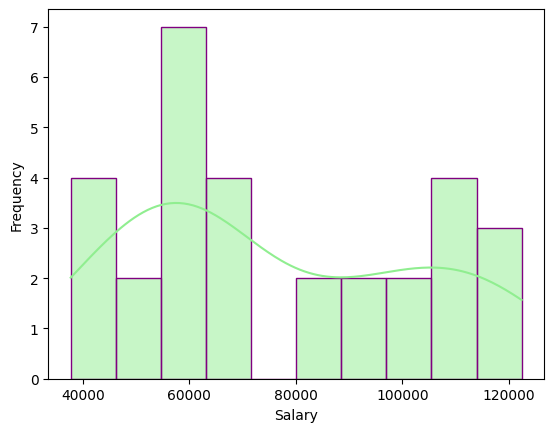

In [9]:
print("Skewness for Salary:", df['Salary'].skew())
plt.figure()
plt.xlabel('Salary')
plt.ylabel('Frequency')
sns.histplot(df['Salary'], bins=10, color='lightgreen', edgecolor='purple', kde=True)


Correlation Matrix:
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


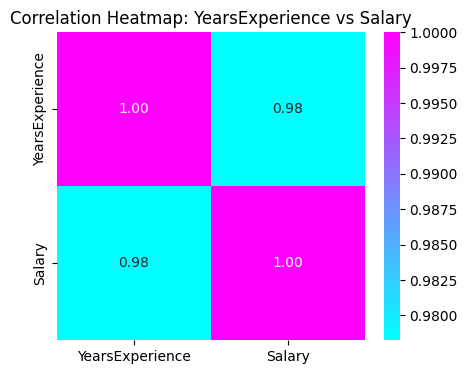

In [10]:
corr = df[['YearsExperience', 'Salary']].corr()
print("\nCorrelation Matrix:")
print(corr)
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='cool', fmt=".2f", square=True)
plt.title("Correlation Heatmap: YearsExperience vs Salary")
plt.show()

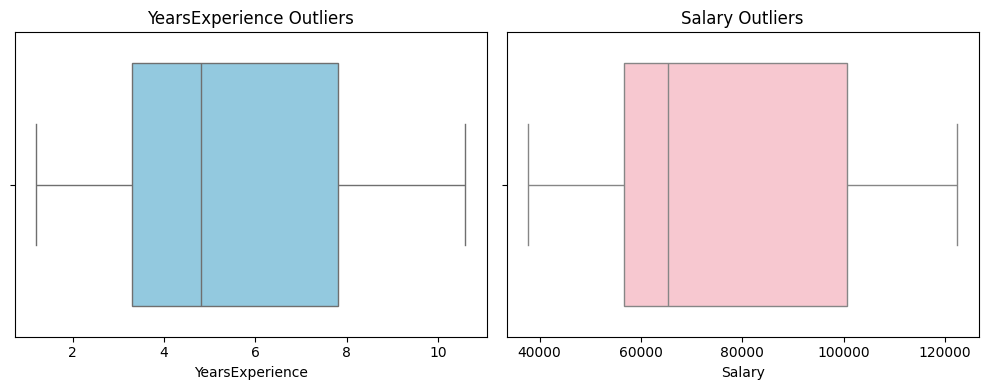

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['YearsExperience'], color='skyblue')
plt.title('YearsExperience Outliers')
plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'], color='pink')
plt.title('Salary Outliers')
plt.tight_layout()
plt.show()

c:\Users\DELL\OneDrive\Desktop\lr_salary\myenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Slope: 9423.82
Intercept: 24380.20
Predicted Salary at 8 years: 99770.72
R² Score (Test): 90.24%
Mean Squared Error (MSE): 49830096.86
Mean Absolute Error (MAE): 6286.45
Root Mean Squared Error (RMSE): 7059.04


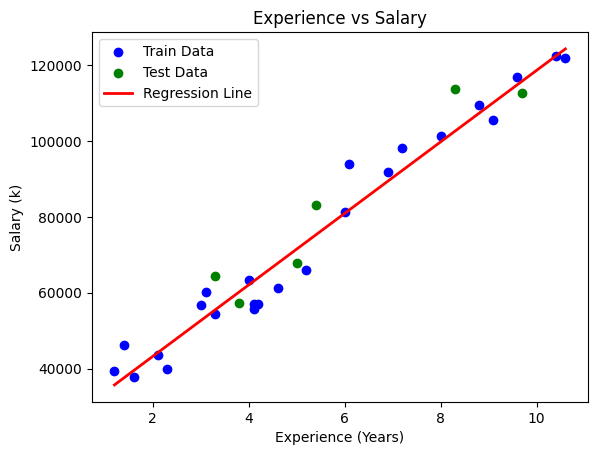

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

slope = model.coef_[0]
intercept = model.intercept_
pred_experience = 8
predicted_salary = model.predict([[pred_experience]])[0]
r2_test = r2_score(y_test, y_test_pred) * 100
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Predicted Salary at {pred_experience} years: {predicted_salary:.2f}")
print(f"R² Score (Test): {r2_test:.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (k)')
plt.legend()
plt.show()
